## Bank Marketing Data Set


Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable target).


Attribute Information:

Input variables:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.preprocessing import StandardScaler, LabelEncoder




In [31]:
df = pd.read_csv('data/bank.csv', sep=';')

df = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

X = df
y = df['y']

In [ ]:
sc = StandardScaler()
sc.fit_transform()

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train,y_train)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(10)

## Change X to feat_importances.nlargest(10)
X = df[feat_importances.nlargest(10).index]

,duration,day,age,balance,month_aug,poutcome_success,campaign,pdays,housing_no,housing_yes
0,123,28,51,-2082,0,0,6,-1,1,0
1,510,5,50,2881,1,0,2,2,1,0
2,131,6,50,1412,1,0,3,-1,1,0
3,247,3,37,0,0,0,13,-1,0,1
4,343,3,31,757,0,0,2,-1,1,0
...,...,...,...,...,...,...,...,...,...,...
447,40,20,47,2515,0,0,3,-1,1,0
448,249,22,33,79,0,0,2,335,0,1
449,756,12,30,0,0,0,3,-1,0,1
450,205,7,37,489,1,0,5,-1,0,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [16]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
y_pred = svc.predict(X_test)

print("Confusion Matrix" ,confusion_matrix(y_test, y_pred))
print("Clasification Report" ,classification_report(y_test, y_pred))
print("Accuracy" , accuracy_score(y_test, y_pred))

Confusion Matrix [[78  1]
 [11  1]]
Clasification Report               precision    recall  f1-score   support

           0       0.88      0.99      0.93        79
           1       0.50      0.08      0.14        12

    accuracy                           0.87        91
   macro avg       0.69      0.54      0.54        91
weighted avg       0.83      0.87      0.82        91

Accuracy 0.8681318681318682


In [19]:
import seaborn as sns

cf_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred)).transpose()



<Axes: >

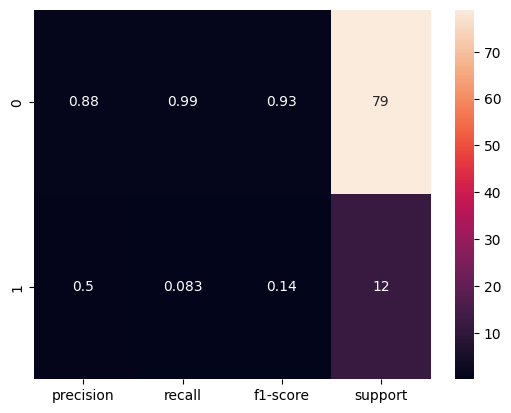

In [20]:
sns.heatmap(cf_df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0), annot=True)

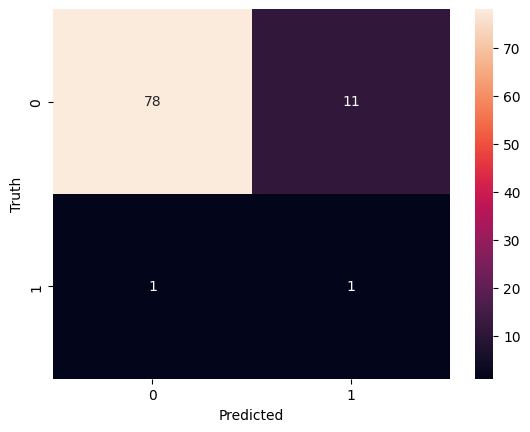

In [21]:
import matplotlib.pyplot as plt

sns.heatmap(cm_df, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()